# The Problem

Do wine review ratings from Sommelier’s reflect the sentiment of the casual wine drinker? Sommeliers have a trained palate that could lead to wine ratings that are representative of  how a wine should taste given it’s variety. However, this may not reflect how drinkable the wine may be for the casual wine drinker.

## The Dataset

The dataset was taken from Kaggle and was scraped from the WineEnthusiast website on November 22, 2017 by @zackthoutt. The total compiled reviews equal 130k+.

# The Experiment

Conduct surveys and collect ratings of wines from different (regions/states/countries) from the consumer and compare the means to the mean ratings from the sommeliers.

# The Method

A link to a survey asking the purchaser questions about the wine they bought would be sent to various retail wine stores in the US and abroad. When a consumer purchased the wine, the store would provide them with the link (could be a QR code that links to the survey).  The survey would ask the consumer to answer the following questions:

1.)What variety of wine did you purchase?
2.)What country/region/state was it from? (provide them with some of the most common options and a write in other section)
3.)What vineyard was it from?
4.)How much was the bottle?
5.)How often do you drink wine (multiple choice with varying amounts of bottles/month)?
6.)On a scale of 1-10, how would you rate your bottle of wine (sliding bar that moved in increments of 0.2)?
7.)How would you describe your wine?

We can then use the mean score of each region/type of wine to compare back to the sommeliers ratings to see if certain locales are rated differently between the two drinking groups. The mean ratings can be compared from a country, region, state, or variety standpoint. They can also be bracketed by price to see if more expensive bottles are rated higher among common drinkers than sommeliers.

As the dataset is summarized I will point out specific points we can compare the survey results back to the original sommelier datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

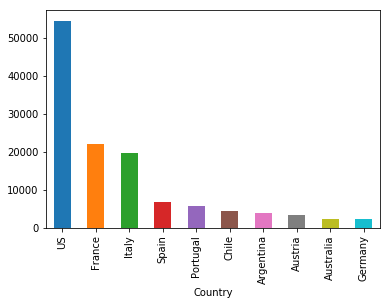

In [88]:
wine = pd.read_csv('winemag-data-130k-v2.csv')

#determining the top countries for wine ratings in the dataset
wine.country.value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.show()

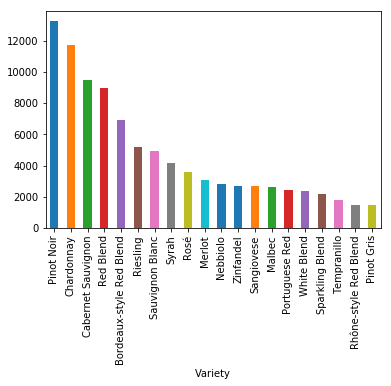

In [75]:
#Simple bar plot to show the top 20 varieties of wines in the dataset
wine.variety.value_counts().head(20).plot(kind='bar')
plt.xlabel('Variety')
plt.show()

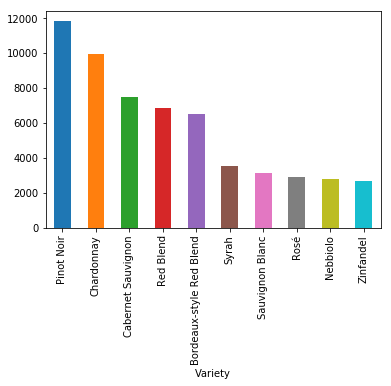

In [89]:
#creating a dataframe and list of the top three countries with wine descriptions
us_wine = wine.loc[wine['country'] == 'US']
french_wine = wine.loc[wine['country'] == 'France']
wine_compare = wine.loc[(wine['country'] == 'US') | (wine['country'] == 'Italy') | (wine['country'] == 'France')]
countries = ['US', 'France', 'Italy']

#determining the largest portion of wines reviewed in the top three countries
wine_compare.variety.value_counts().head(10).plot(kind='bar')
plt.xlabel('Variety')
plt.show()

### QUICK NOTE

Since Pinot Noir is the most reviewed variety of wine, I wanted single it out and look at how the rating compares for the top three countries that have wines reviewed in the dataset. I went ahead and created dataframes for the second and third most reviewed varieties to see how prevalent they were in the top countries.

The total number of Pinot Noir reviews for each country are:
US        9885
France    1966
Italy        6
Name: country, dtype: int64

The total number of Cabernet Sauvignon reviews for each country are:
US        7315
Italy      131
France      57
Name: country, dtype: int64

The total number of Chardonnay reviews for each country are:
US        6801
France    2808
Italy      334
Name: country, dtype: int64


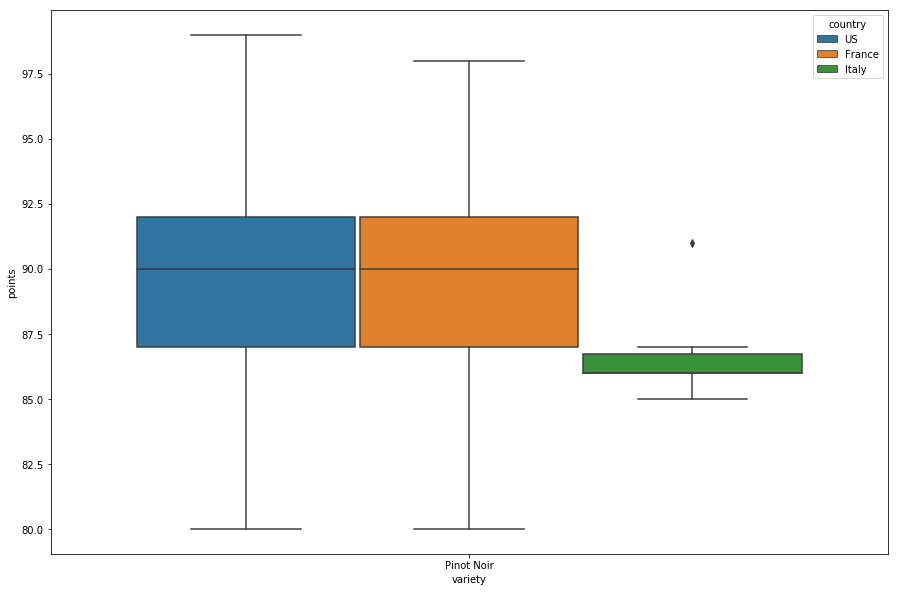

In [74]:
#Creating dataframes for the three most common varieties.
compare_pinoir = wine_compare[wine_compare['variety']=='Pinot Noir']
compare_cabsav = wine_compare[wine_compare['variety']=='Cabernet Sauvignon']
compare_chard = wine_compare[wine_compare['variety']=='Chardonnay']

print('The total number of Pinot Noir reviews for each country are:\n{}'.format(compare_pinoir.country.value_counts()))
print('\nThe total number of Cabernet Sauvignon reviews for each country are:\n{}'.format(compare_cabsav.country.value_counts()))
print('\nThe total number of Chardonnay reviews for each country are:\n{}'.format(compare_chard.country.value_counts()))

plt.figure(figsize=(15,10))
sns.boxplot(x="variety", y="points", hue="country", data=compare_pinoir)
plt.show()

### First Benchmark Review Point

Comparing French and American Pinot Noir ratings show that the distributions are almost identical. The Italian Pinot Noir seems to be rated worse than the other two countries, but sample size is likely to blame here. Taking sample size into consideration, we can remove the Italian Pinot Noir's from this analysis and focus on the French and American varieties when evaluating the survey results.

Since the US has the most reviews of Pinot Noir it would also be good to test the mean rating of American Pinot Noir's seperated by their state of origin. This could help determine whether there is bias among the sommeliers for regions in the US that are better for Pinot Noirs and if the casual wine drinker agrees.

As survey observations are evaluated, I can use this sample subset to check if the common wine drinker is evaluating French and American Pinot Noirs similarly to one another or if they would rate one country better than another. To accomplish this I will use a Ttest and p-value.

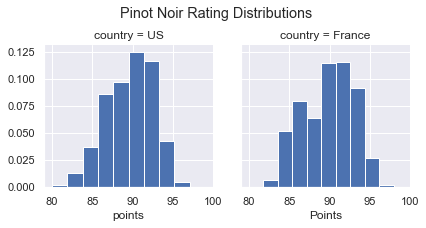

In [197]:
#updating wine_compare variable to remove Italy and simplify future analysis
wine_compare2 = wine.loc[(wine['country'] == 'US') | (wine['country'] == 'France')]
compare_pinoir2 = wine_compare2[wine_compare2['variety']=='Pinot Noir']

#comparing population distributions of rating points for the two countries
sns.set(style='darkgrid')
subplt = sns.FacetGrid(compare_pinoir2, col="country")
subplt.map(plt.hist, "points", density=True)
plt.suptitle('Pinot Noir Rating Distributions', y=1.05)
plt.xlabel('Points')
plt.show()

In [97]:
#The distributions of Pinot Noir ratings for both countries are normal and can use a Ttest to evaluate their similarity
#generating equally sized samples from the two countries in order to run a ttest of the sample means
us_pinoir = us_wine[us_wine['variety']=='Pinot Noir']
french_pinoir = french_wine[french_wine['variety']=='Pinot Noir']
us_pinoir_smpl = np.random.choice(us_pinoir['points'], 1000, replace=True)
french_pinoir_smpl = np.random.choice(french_pinoir['points'], 1000, replace=True)

stats.ttest_ind(us_pinoir_smpl, french_pinoir_smpl)

Ttest_indResult(statistic=-1.5253918648134523, pvalue=0.12731965445613141)

### First Benchmark Review Point Contd.

The Ttest of sommelier ratings confirms that the US and France have mean ratings that are not dissimilar from one another. If the survey results show a pvalue of 0.05 or less when comparing the French vs. US Pinot Noirs, then there is a difference in the way consumers evaluate wine quality compared to sommeliers.

Next I want to look at the top US wine varieties to determine if there is a difference in the regions average wine ratings.

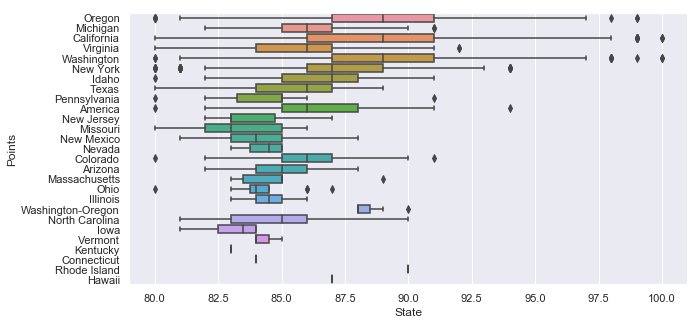

In [212]:
#creating a plot to look at average wine ratings in the US broken down by state
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
ax = sns.boxplot(x="points", y="province", data=us_wine)
ax.set(xlabel='State', ylabel='Points')
plt.show()

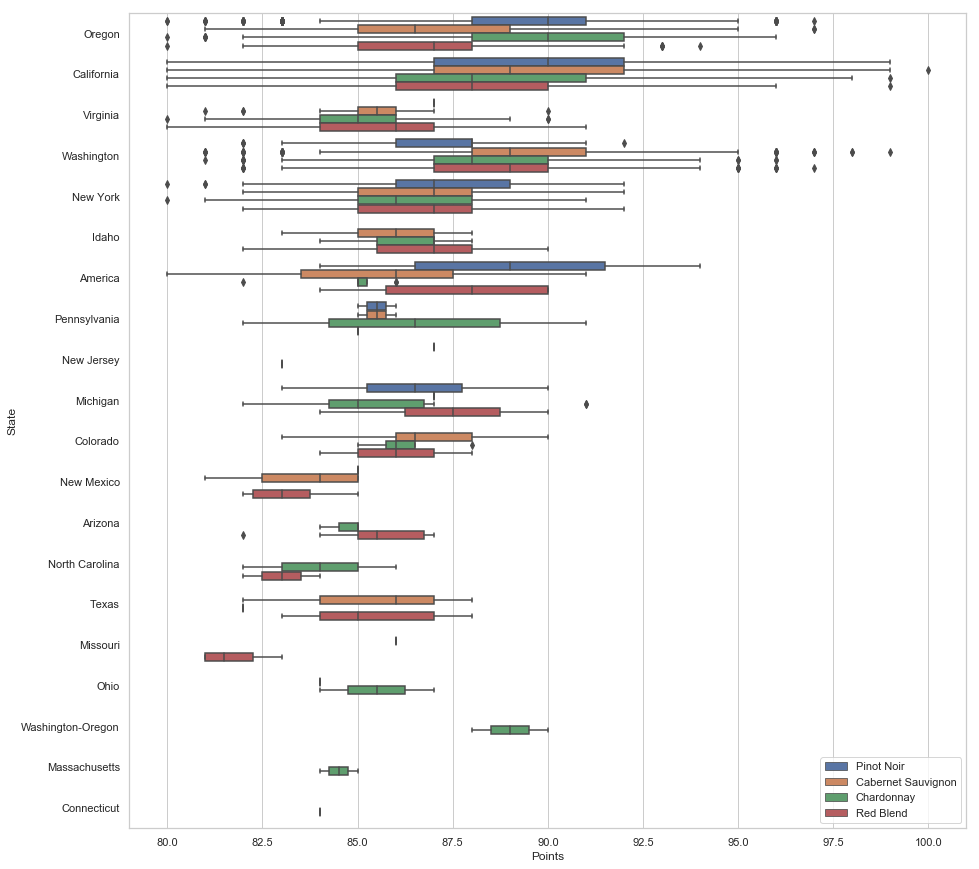

In [213]:
#Creating a dataframe of the top 4 wine varieties in the reviewed database
us_wine_compare = us_wine.loc[(us_wine['variety']=='Pinot Noir') | (us_wine['variety']=='Cabernet Sauvignon') |
                              (us_wine['variety']=='Chardonnay') | (us_wine['variety']=='Red Blend')]

#storing the different state names in a list to order the boxplots
us_wine_province = us_wine_compare['province'].unique()


plt.figure(figsize=(15,15))
sns.set(style='whitegrid')
box = sns.boxplot(x='points', y='province', hue='variety', data=us_wine_compare, order=us_wine_province)
box.set(xlabel='Points', ylabel='State')
plt.legend(loc='lower right')
plt.show()

### Quick State Review

There is quite a lot of variation in the wine ratings based on their state of origin and their variety. Considering there is a lot of information on the box plot above, let's focus in on the two most popular states that have the highest average ratings for Pinot Noirs (the most reviewed wines in the data set). By focusing on the most popular wine variety by reviewers, we have a better chance at collecting similar data from the survey of consumers.

The mean rating of Oregon Pinot Noir is: 89.47092605886576
The mean rating of California Pinot Noir is: 89.73143851508121


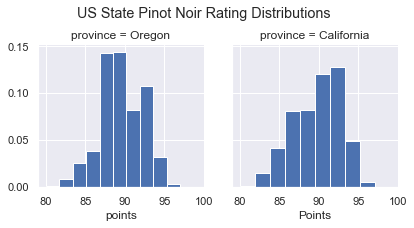

Ttest_indResult(statistic=-0.3797243294936413, pvalue=0.7041904144208113)

In [208]:
state_pinoir_compare = us_pinoir.loc[(us_pinoir['province']=='Oregon') | (us_pinoir['province']=='California')]
oregon_pinoir = us_pinoir[us_pinoir['province']=='Oregon']
cali_pinoir = us_pinoir[us_pinoir['province']=='California']
ore_pinoir_smpl = np.random.choice(oregon_pinoir['points'], 1000, replace=True)
cali_pinoir_smpl = np.random.choice(cali_pinoir['points'], 1000, replace=True)

print('The mean rating of Oregon Pinot Noir is: {}'.format(oregon_pinoir['points'].mean()))
print('The mean rating of California Pinot Noir is: {}'.format(cali_pinoir['points'].mean()))

sns.set(style='darkgrid')
subplt = sns.FacetGrid(state_pinoir_compare, col="province")
subplt.map(plt.hist, "points", density=True)
plt.suptitle('US State Pinot Noir Rating Distributions', y=1.05)
plt.xlabel('Points')
plt.show()

stats.ttest_ind(ore_pinoir_smpl, cali_pinoir_smpl)

### Second Benchmark Review Point

Before running the Ttest I wanted to check for normality in the point distributions for Oregon and California. I assumed that they were normal given that the US distribution for Pinot Noir was normal, but it's confirmed with the above histograms.

Comparing Oregon and California Pinot Noir's using a Ttest is a little unclear. When using random samples from the dataset, there are some cases where the pvalue > 0.05 and some where the pvalue < 0.05. After reviewing the population means and the distributions it is more likely that they are not dissimilar from one another. These make good states to compare because of the volume of wine that is produced from the two states and their reputation as being Pinot Noir regions. This leaves a good chance that we can reproduce this test with the survey results.

### Conclusions

With the implementation of this survey, we can ground truth how sommelier's have been rating wine with the honest feedback from the consumer. By evaluating what the consumer thinks about a wine variety or a regions wine variety, the vineyards can better market their product to the consumer and the common wine drinker could have a better rating system that would more accurately what they want to drink.